In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("/content/Salary_Data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**EDA and visualization**

<ipython-input-7-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

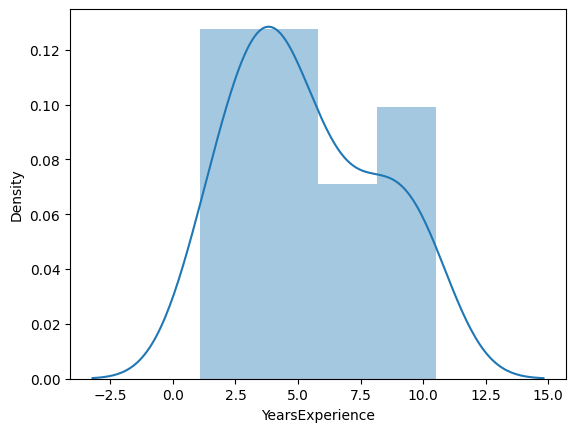

In [7]:
sns.distplot(data['YearsExperience'])

<ipython-input-8-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

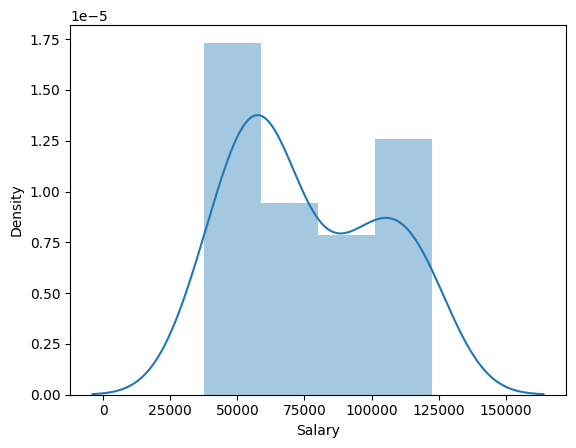

In [8]:
sns.distplot(data['Salary'])

**Model building**

In [10]:
model = smf.ols("Salary~YearsExperience",data=data).fit()

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

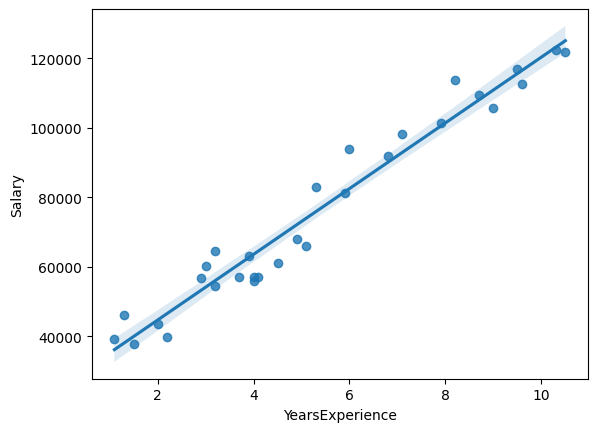

In [13]:
sns.regplot(x="YearsExperience", y="Salary", data=data)

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


**Predict for new data point**

In [15]:
newdata=pd.Series([5,1.6])

In [16]:
data_pred = pd.DataFrame(newdata,columns=['YearsExperience'])

In [18]:
data_pred

,YearsExperience
0,5.0
1,1.6


In [19]:
model.predict(data_pred)

0    73042.011806
1    40912.139913
dtype: float64